In [ ]:
import pandas as pd
import zipfile
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
z= zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/YouTube-Spam-Collection-v1.zip")
Psy=pd.read_csv(z.open("Youtube01-Psy.csv"))
Psy.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
 data = pd.concat([Psy])
 data.drop(["COMMENT_ID","DATE","AUTHOR"],axis=1,inplace=True)


ham equals 0
spam equals 1

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data["CONTENT"],data["CLASS"])
print(X_train,X_test,y_train,y_test)

49     thumbs up if u checked this video to see hw vi...
92                            Check my channel, please!﻿
89     Ching Ching ling long ding ring yaaaaaa Ganga ...
324    Hahah, juyk! I allways laugh at the part 1:57....
79     Hi there~I'm group leader of Angel, a rookie K...
                             ...                        
90     https://www.indiegogo.com/projects/cleaning-th...
121    how can there be 2.124.821.694 views, when im ...
166    please like : http://www.bubblews.com/news/927...
0      Huh, anyway check out this you[tube] channel: ...
194    WAT DA FUCK THIS THE MOST VIEWED VIDEO IN YOUT...
Name: CONTENT, Length: 262, dtype: object 206                                      Wow 23 min ago﻿
195    OMG 2/7 People watched this video because ther...
128    Discover a beautiful song of A young Moroccan ...
327    https://www.facebook.com/FUDAIRYQUEEN?pnref=st...
312    I still to this day wonder why this video is s...
                             ...              

In [ ]:
tfidf_vect = TfidfVectorizer(use_idf=True,lowercase=True)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(262, 1161)

In [ ]:
model =MultinomialNB()
model.fit(X_train_tfidf,y_train)


MultinomialNB()

In [ ]:
X_test_tfidf= tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)
predictions

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
confusion_matrix(y_test,predictions)

array([[44,  4],
       [ 0, 40]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        48
           1       0.91      1.00      0.95        40

    accuracy                           0.95        88
   macro avg       0.95      0.96      0.95        88
weighted avg       0.96      0.95      0.95        88



#Confusion Matrix

In [ ]:
#This Function converts the Probability of our model into labels
def ProToClass(ProList):
    ClassList=[]
    for x in ProList:
        if (x >= 0.5):
            ClassList.append(1)                
        else:
            ClassList.append(0)
    return ClassList

In [ ]:
y_test_pre=model.predict(X_test_tfidf)
 #print(y_test)
  
# y_test_pre=keras.utils.to_categorical(y_test_pre, num_classes=2)
y_test_pre = ProToClass(y_test_pre)
print(y_test_pre)
print("******************")
print("Confusion Matrix")
cm1 = confusion_matrix(y_test,y_test_pre,labels=[1, 0])
print(cm1)

[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]
******************
Confusion Matrix
[[40  0]
 [ 4 44]]


In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

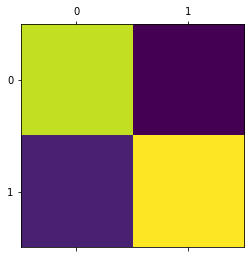

In [ ]:
plt.matshow(cm1)

In [ ]:
def plot_confusion_matrix(cm, y_test_pre, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(y_test_pre))
    plt.xticks(tick_marks, y_test_pre, rotation=60)
    plt.yticks(tick_marks,y_test_pre)
    plt.tight_layout()

    width,height =cm.shape
    

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm1,y_test_pre)

plt.savefig('confusionMatrix.png')
plt.savefig('confusionMatrix.pdf')